In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Clustering coefficient

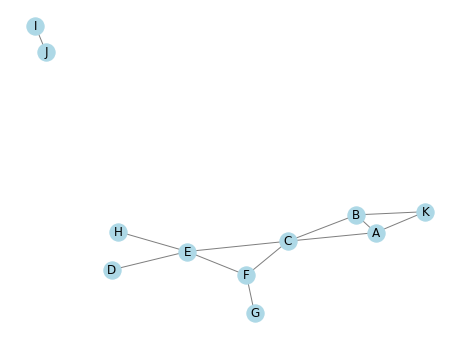

In [2]:
G = nx.Graph()
G.add_edges_from([('A', 'K'), 
                  ('A', 'B'),
                  ('A', 'C'),
                  ('B', 'C'),
                  ('B', 'K'),
                  ('C', 'E'),
                  ('C', 'F'), 
                  ('D', 'E'), 
                  ('E', 'F'), 
                  ('E', 'H'), 
                  ('F', 'G'), 
                  ('I', 'J')])

pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

# Local clustering coefficient

Local clustering coefficient describes how densely node's friends are connected. In particular, is a fraction of pairs of node's friends that are friends with each other

In [3]:
nx.clustering(G, 'F')

0.3333333333333333

In case of node F's friends, only C and E are friends with each other. For A, two thirds of its friends are also friends.

In [4]:
nx.clustering(G, 'A')

0.6666666666666666

In [5]:
nx.clustering(G, 'J')

0

# Global clustering coefficient

What if we want to what is a clustering coefficient for the whole graph? In a first approach, we can average clustering for all nodes

In [6]:
nx.average_clustering(G)

0.28787878787878785

We can also check what fraction of "open triads" that are traingles in a network. Transitivity is used for that purpose.

Transitivity = 3 * number of closed triads / number of open triads

In [7]:
nx.transitivity(G)

0.4090909090909091

Transitivity has such property, that it weights the nodes with large degree higher

# Distance measures

Distance between two nodes: the length of the shortest path between them

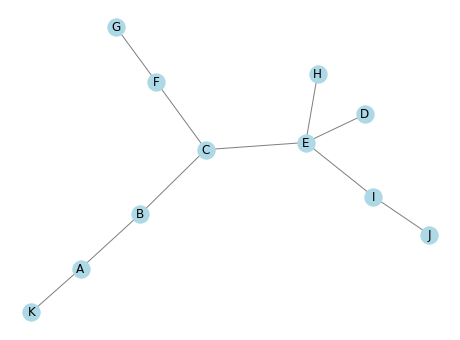

In [8]:
G = nx.Graph()
G.add_edges_from([('A', 'K'), 
                  ('A', 'B'),
                  ('B', 'C'),
                  ('C', 'F'),
                  ('F', 'G'),
                  ('C', 'E'),
                  ('C', 'F'), 
                  ('E', 'E'), 
                  ('E', 'D'), 
                  ('E', 'H'), 
                  ('E', 'I'), 
                  ('I', 'J')])

pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

In [9]:
nx.shortest_path_length(G, 'A', 'H')

4

In [10]:
nx.shortest_path(G, 'A', 'H')

['A', 'B', 'C', 'E', 'H']

# Breadth-first search

An efficient way to find the distance to all the nodes, starting from a particular node is breadth-first search. We "discover" the nodes in layers.

Networkx let's us visualize this process

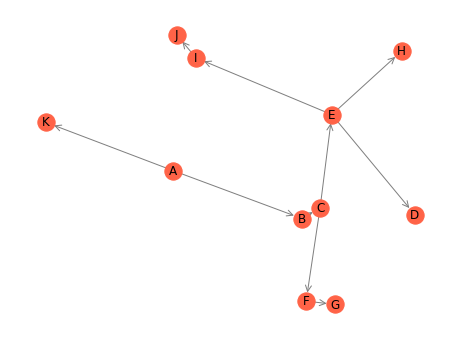

In [11]:
T = nx.bfs_tree(G, 'A')
pos = nx.layout.spring_layout(T)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(T, pos, node_color='tomato')
nx.draw_networkx_edges(T, pos, edge_color='grey', arrowstyle='->', arrowsize=15)
nx.draw_networkx_labels(T, pos)
plt.axis('off');

In [12]:
nx.shortest_path_length(G, 'A')

{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'F': 3,
 'E': 3,
 'G': 4,
 'D': 4,
 'H': 4,
 'I': 4,
 'J': 5}

In [13]:
nx.average_shortest_path_length(G)

2.8727272727272726

Diameter - max shortest path length

In [14]:
nx.diameter(G)

6

Eccentricity of a node n is the largest distance between node n and all other nodes

In [15]:
nx.eccentricity(G)

{'A': 5,
 'K': 6,
 'B': 4,
 'C': 3,
 'F': 4,
 'G': 5,
 'E': 4,
 'D': 5,
 'H': 5,
 'I': 5,
 'J': 6}

The radius of the graph is the min eccentricity of the network

In [16]:
nx.radius(G)

3

The periphery of a graph is a set of nodes that have eccentricity equal to the diameter of the graph

In [17]:
nx.periphery(G)

['K', 'J']

Opposite of a graph's periphery is the center of the graph - it's a set of nodes that are in the center of a graph

In [18]:
nx.center(G)

['C']

# Karate club graph analysis

Karate club graph describes friends within a university karate club. Two partitions of a graph are visible, indicating two groups of friends

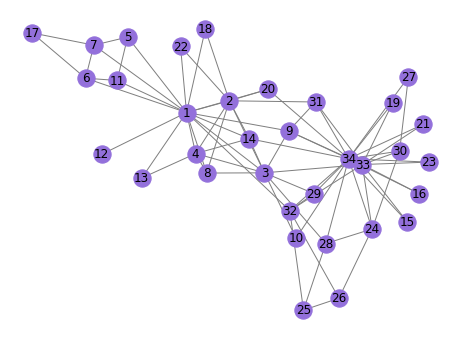

In [19]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label=1)

pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color='mediumpurple')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.axis('off');

On average, distance between a pair of nodes is about 2.5

In [20]:
nx.average_shortest_path_length(G)

2.408199643493761

Radius of a graph is three, what means that for one of the nodes the distance to all other nodes is three

In [21]:
nx.radius(G)

3

The largest distance between a pair of nodes is five

In [22]:
nx.diameter(G)

5

There are some nodes that are central to the network

In [23]:
nx.center(G)

[1, 2, 3, 4, 9, 14, 20, 32]

There are also some nodes at the netowork's periphery - their eccentricity is equal to the diameter

In [24]:
nx.periphery(G)

[15, 16, 17, 19, 21, 23, 24, 27, 30]